/home/deepak/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:434: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Mean Squared Error: 2.331534157018201e-21


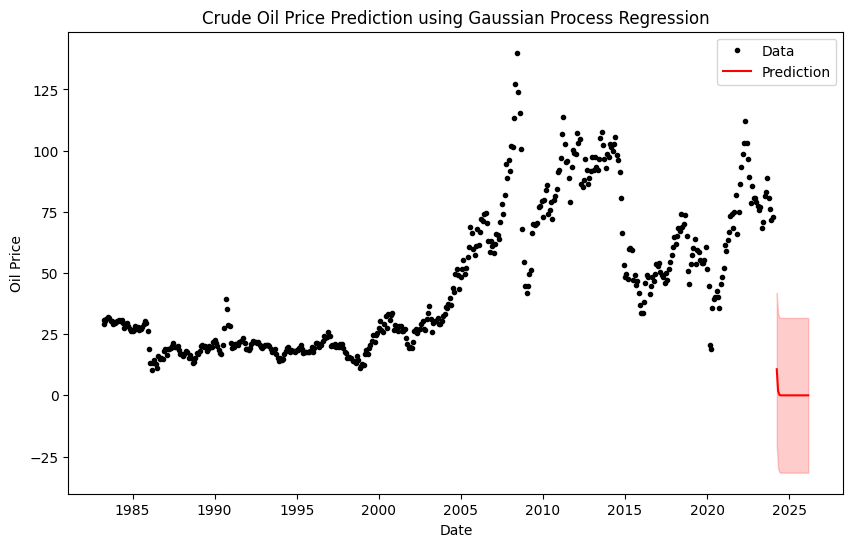

In [2]:
# Importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import mean_squared_error

# Data Wrangling
# Reading the data
co_data = pd.read_csv("/home/deepak/4th semester/ML/Project/dataset/crude-oil-price.csv", parse_dates=['date'])

# Renaming the columns
co_data = co_data.rename(columns={'date': 'ds', 'price': 'y'})

# Convert date-time to numerical
co_data['ordinal_date'] = co_data['ds'].apply(lambda x: x.toordinal())

# Time series model
X = co_data[['ordinal_date']].values.reshape(-1, 1)
y = co_data['y'].values

# Define the kernel
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))

# Create Gaussian Process model
model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Fit the model
model.fit(X, y)

# Calculate mean squared error
mse = mean_squared_error(y_true=y, y_pred=model.predict(X))
print("Mean Squared Error:", mse)

# Future dataframe with 24 months
future_dates = pd.date_range(start='2024-03-31', periods=24, freq='M')
future_ordinal_dates = np.array([d.toordinal() for d in future_dates]).reshape(-1, 1)

# Predict
y_pred, sigma = model.predict(future_ordinal_dates, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(co_data['ds'], y, 'k.', label='Data')
plt.plot(future_dates, y_pred, 'r-', label='Prediction')
plt.fill_between(future_dates, y_pred - sigma, y_pred + sigma, alpha=0.2, color='r')
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.title('Crude Oil Price Prediction using Gaussian Process Regression')
plt.legend()
plt.show()
